# Análise da diferença salarial para trabalhadores de TI conforme a escolaridade de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a escolaridade de cada indivíduo em 2021.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [3]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

# Faixas de idades: 18 - 24 # 25 - 30 # 31 - 40 # 41 - 50 # 51 - 90
replace_values_faixas = {(18, 19, 20, 21, 22, 23, 24): '18 - 24',
                  (25, 26, 27, 28, 29, 30): '25 - 30',
                  (31, 32, 33, 34, 35, 36, 37, 38, 39, 40): '31 - 40',
                  (41, 42, 43, 44, 45, 46, 47, 48, 49, 50): '41 - 50',
                  (51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
                   71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90): '51 - 90'}

### Etapa de leitura dos dados das tabelas em CSV:

In [4]:
#Leitura da tabela de dados gerais:
RAIS_GERAL_2021 = pd.read_csv("C:/Users/leila/estagio/data/raw/DATA_RAIS_GERAL_2021.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2021.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de escolaridade para utilização correta:

In [5]:
# Retirando dados referentes a indivíduos com menos de 18:
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021['Idade'] >= 18]

# Retirando dados referentes a indivíduos com mais de 90:
RAIS_GERAL_2021 = RAIS_GERAL_2021[RAIS_GERAL_2021['Idade'] <= 90]

In [6]:
# Substituição dos valores de cada idade pelas faixas definidas:
RAIS_GERAL_2021['Idade'].replace(replace_values_faixas, inplace = True)

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [7]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2021
# até 09/2023 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2021 = 1.01122970

RAIS_GERAL_2021["Remuneração"] = RAIS_GERAL_2021["Remuneração"] * fator_correcao_inflacao_2021

### Exibição da tabela geral:

In [8]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2021.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317210,85201,1,18 - 24,8,"1,372.23",1
1,MS,317210,85201,1,18 - 24,9,"1,338.76",1
2,MS,317210,85201,1,18 - 24,9,"1,405.69",1
3,MS,212405,72100,1,18 - 24,8,"4,550.53",1
4,MS,317205,47717,1,25 - 30,8,"5,256.67",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [9]:
# Tabela principal para quantidade em 2021:
RAIS_GERAL_2021_QNT = pd.crosstab(RAIS_GERAL_2021["Idade"], RAIS_GERAL_2021["Sexo"].replace(sexo))
RAIS_GERAL_2021_QNT.insert(1, "% Fem.", RAIS_GERAL_2021_QNT["Fem."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)
RAIS_GERAL_2021_QNT.insert(3, "% Masc.", RAIS_GERAL_2021_QNT["Masc."] / (RAIS_GERAL_2021_QNT["Fem."] + RAIS_GERAL_2021_QNT["Masc."]) * 100)

RAIS_GERAL_2021_QNT

Sexo,Fem.,% Fem.,Masc.,% Masc.
Idade,,,,
18 - 24,21003,21.22,77972,78.78
25 - 30,36600,21.77,131500,78.23
31 - 40,47252,19.20,198887,80.80
41 - 50,24414,20.90,92398,79.10
51 - 90,10311,21.02,38752,78.98


In [10]:
# Tabela para gráfico da quantidade:
RAIS_GERAL_2021_QNT["Total"] = RAIS_GERAL_2021_QNT["% Masc."] + RAIS_GERAL_2021_QNT["% Fem."]
RAIS_GERAL_2021_QNT["Ano"] = "2021"

# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2021_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

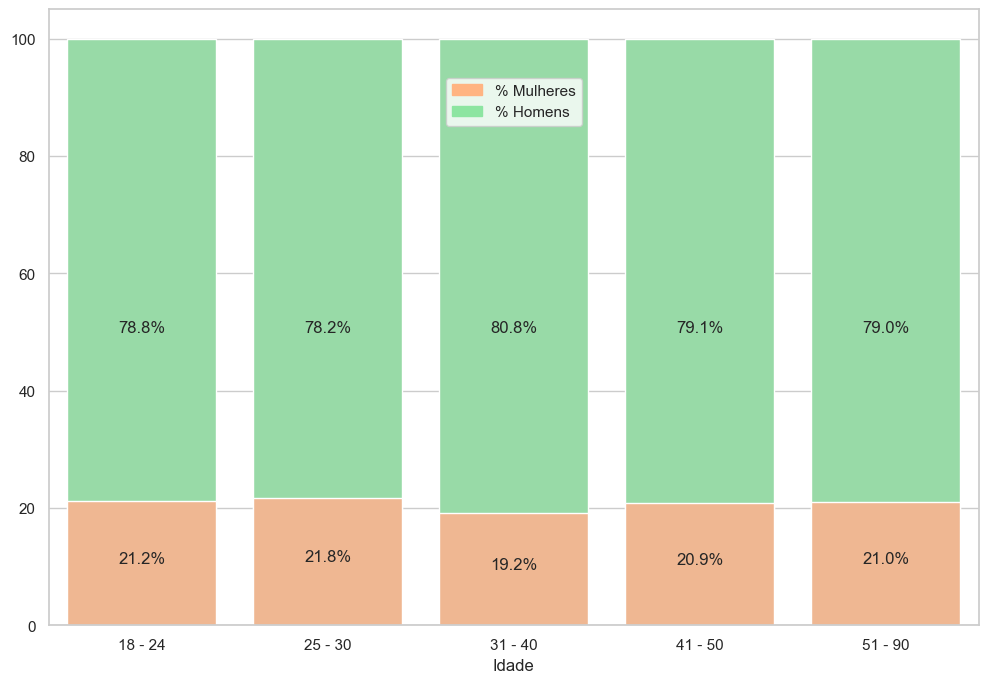

In [12]:
# Montagem inicial da imagem do gráfico:
plt.figure(figsize=(12, 8))

# Configuração da grid da imagem:
sns.set(style="whitegrid")

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Criação da primeira barra, referente ao total de 100% que fica atrás pela próxima barra:
bar1 = sns.barplot(x="Idade", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_masc})

# Captura da quantidade de barras existentes até o momento:
patches = bar1.patches

# Escrita da porcentagem para cada barra existente até o momento (porcentagem dos homens):
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."][i]), (x, y), ha='center')
   

# Criação da segunda barra, referente a porcentagem das mulheres:
bar2 = sns.barplot(x="Idade", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette={"2021": color_fem})

# Finalização de configurações de exibição do gráfico:
top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(.45, .8, .1, .1))

# Adicionar rótulos com as porcentagens femininas nas barras
for i in bar2.patches:
    width = i.get_width()
    height = i.get_height()
    x, y = i.get_xy()
    if height < 100.0:
        bar2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center')

plt.ylabel('')  # Remover o título do eixo y

plt.savefig("C:/Users/leila/estagio/data/figures/svg/qnt_sexo_idade.svg")

## Análise das médias salariais e diferenças:

### Distribuição da remuneração para cada sexo cruzado pela escolaridade:

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

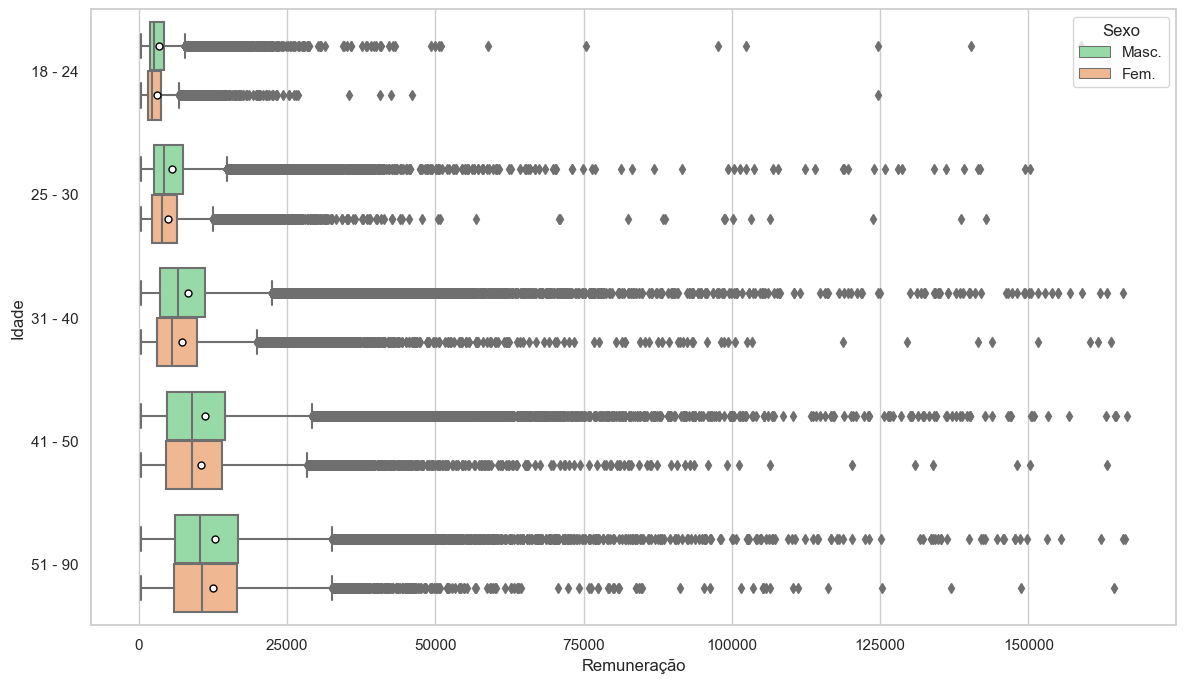

In [12]:
RAIS_GERAL_2021_BOX = RAIS_GERAL_2021.copy()
RAIS_GERAL_2021_BOX["Sexo"].replace(sexo, inplace = True)

box = sns.boxplot(x = 'Remuneração', y = 'Idade', hue = 'Sexo', data = RAIS_GERAL_2021_BOX, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = replace_values_faixas.values(),
                        palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(14, 8)
box.figure.savefig("C:/Users/leila/estagio/data/figures/png/boxplot_sexo_idade_2021.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:

In [13]:
# Tabela principal para média e diferença salarial em 2021:
RAIS_GERAL_2021_MEDIA = pd.crosstab(RAIS_GERAL_2021["Idade"], RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2021_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIA["Fem."] - RAIS_GERAL_2021_MEDIA["Masc."]) / RAIS_GERAL_2021_MEDIA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"3,034.37","3,432.68",-11.60
25 - 30,"4,972.12","5,645.87",-11.93
31 - 40,"7,322.61","8,392.67",-12.75
41 - 50,"10,560.33","11,134.42",-5.16
51 - 90,"12,550.79","12,882.11",-2.57


In [14]:
RAIS_GERAL_2021_MEDIA["Ano"] = "2021"

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

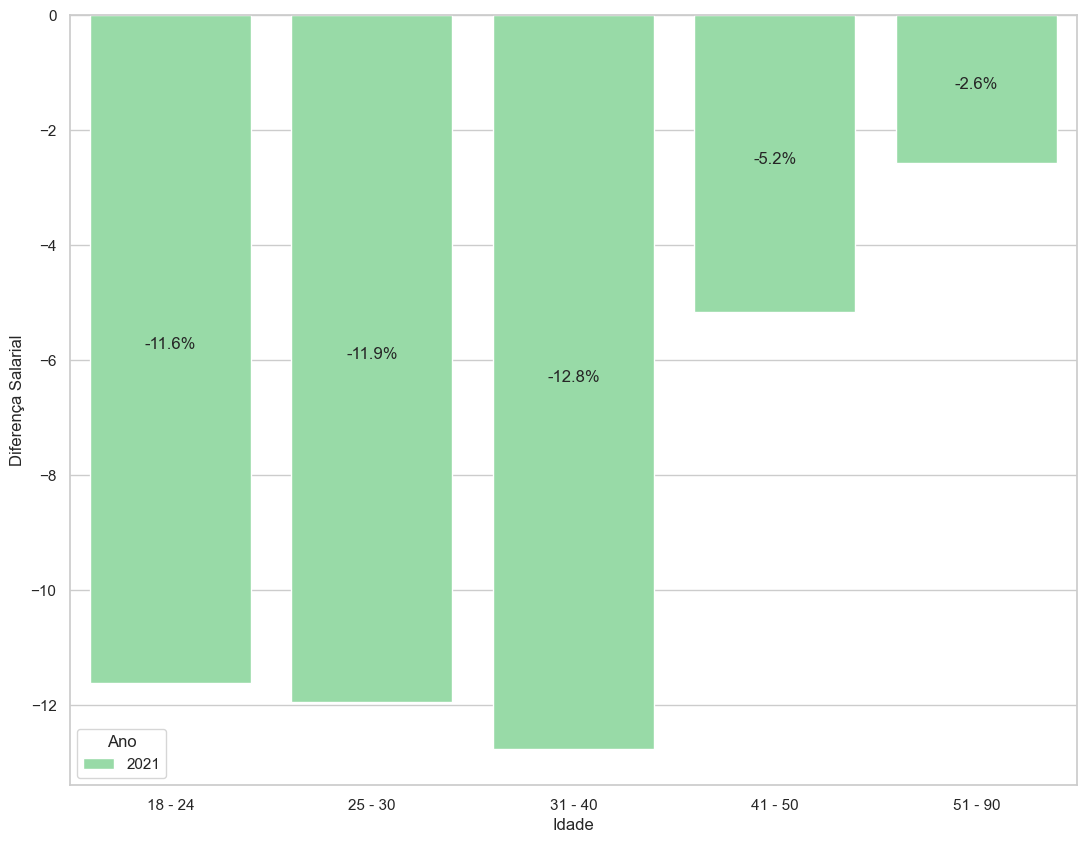

In [15]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/png/dif_salarial_sexo_idade_media.png", dpi = 300)

In [16]:
# Tabela principal para média e diferença salarial em 2021:
RAIS_GERAL_2021_MEDIANA = pd.crosstab(RAIS_GERAL_2021["Idade"], RAIS_GERAL_2021["Sexo"].replace(sexo), values = RAIS_GERAL_2021.Remuneração, aggfunc = 'median')
RAIS_GERAL_2021_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2021_MEDIANA["Fem."] - RAIS_GERAL_2021_MEDIANA["Masc."]) / RAIS_GERAL_2021_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2021_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
Idade,,,
18 - 24,"2,313.46","2,578.64",-10.28
25 - 30,"3,842.67","4,304.97",-10.74
31 - 40,"5,695.57","6,670.33",-14.61
41 - 50,"8,978.25","9,023.38",-0.50
51 - 90,"10,652.69","10,405.51",2.38


In [17]:
RAIS_GERAL_2021_MEDIANA["Ano"] = "2021"

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2021_MEDIANA]).reset_index()

C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\leila\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categoric

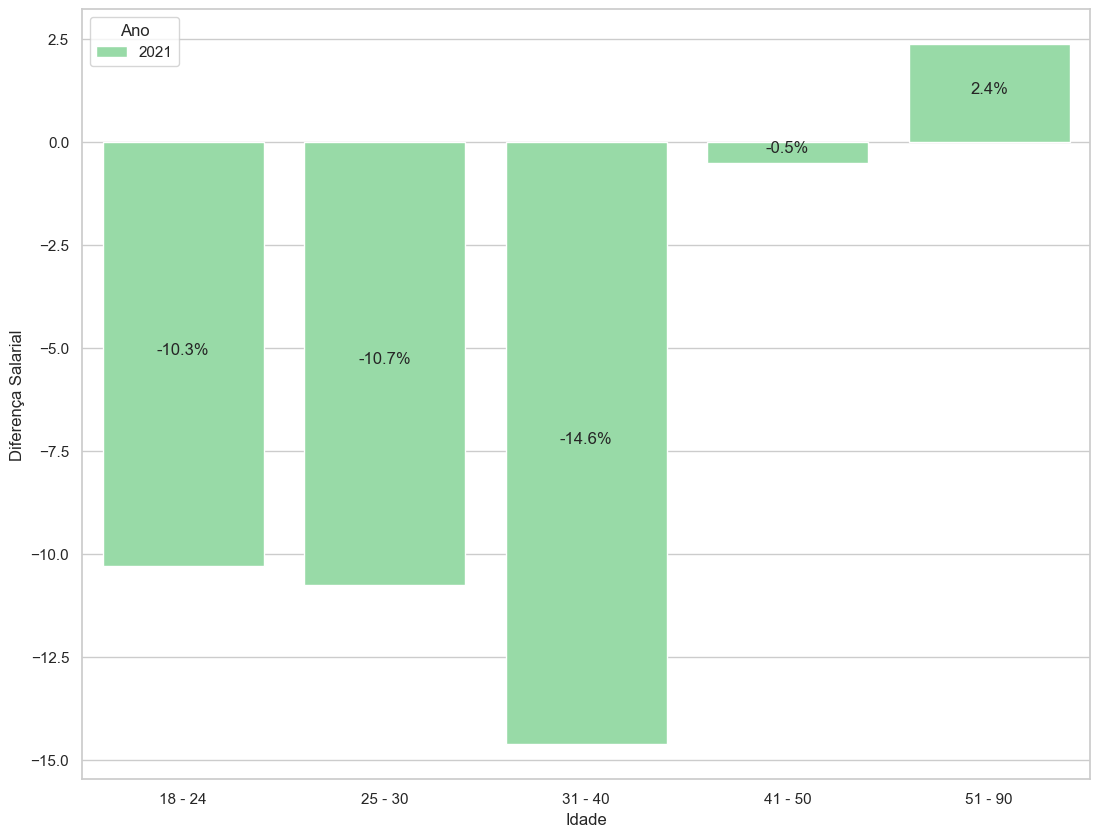

In [18]:
# Criação do gráfico inicial:
plt.figure(figsize = (13, 10))

# Configuração do grid do gráfico:
sns.set(style = "whitegrid")

# Criação da barra referente as diferenças salarias:
bar = sns.barplot(x = "Idade", y = "Diferença Salarial", hue = "Ano", data = RAIS_GERAL_MEDIANA_GRAF, palette = {"2021": color_fem,"2021": color_masc})

# Captura da quantidade de barras existentes:
patches = bar.patches

# Prenchimento das porcentagens das diferenças salariais em cada barra:
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()/2
    bar.annotate('{:.1f}%'.format(RAIS_GERAL_MEDIANA_GRAF["Diferença Salarial"][i]), (x, y), ha='center')

plt.savefig("C:/Users/leila/estagio/data/figures/png/dif_salarial_sexo_idade_mediana.png", dpi = 300)

### Teste de hipótese para cada grupo de médias por CBOs:

In [19]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [20]:
RAIS_GERAL_2021.query("Sexo == 1")

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317210,85201,1,18 - 24,8,"1,372.23",1
1,MS,317210,85201,1,18 - 24,9,"1,338.76",1
2,MS,317210,85201,1,18 - 24,9,"1,405.69",1
3,MS,212405,72100,1,18 - 24,8,"4,550.53",1
4,MS,317205,47717,1,25 - 30,8,"5,256.67",1
...,...,...,...,...,...,...,...,...
672145,RS,212405,63119,11,41 - 50,2,"13,387.92",1
672146,RS,212420,69206,11,31 - 40,8,"3,760.73",1
672147,RS,317110,62023,11,31 - 40,9,"10,743.45",1
672148,RS,317110,62023,11,31 - 40,9,"14,612.01",1


In [21]:
TESTE_HIP_2021 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for idade in replace_values_faixas:
    df1 = RAIS_GERAL_2021.query("Sexo == 1").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    df2 = RAIS_GERAL_2021.query("Sexo == 2").query("Idade == '{}'".format(replace_values_faixas[idade])).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result= teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2021.loc[replace_values_faixas[idade]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]

RAIS_GERAL_2021_HIP = pd.merge(RAIS_GERAL_2021_MEDIANA, TESTE_HIP_2021, left_index=True, right_index=True)
RAIS_GERAL_2021_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2021_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2021_HIP.head()

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
Idade,,,,,
18 - 24,"2,313.46","2,578.64",729917297.5,0.01 > 0.00000...,Medianas estatisticamente diferentes
25 - 30,"3,842.67","4,304.97",2185873649.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
31 - 40,"5,695.57","6,670.33",4205804733.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
41 - 50,"8,978.25","9,023.38",1101966115.0,0.01 > 0.00000...,Medianas estatisticamente diferentes
51 - 90,"10,652.69","10,405.51",200954389.5,0.01 > 0.81968...,Medianas estatisticamente iguais
